In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path = "C:\\Users\\nikhi\\OneDrive\\Desktop\\cgproject\\kaggle\\train"
data_test_path = "C:\\Users\\nikhi\\OneDrive\\Desktop\\cgproject\\kaggle\\test"
data_val_path = "C:\\Users\\nikhi\\OneDrive\\Desktop\\cgproject\\kaggle\\validation"

In [5]:
img_width = 180
img_height =180 

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 357 files belonging to 36 classes.


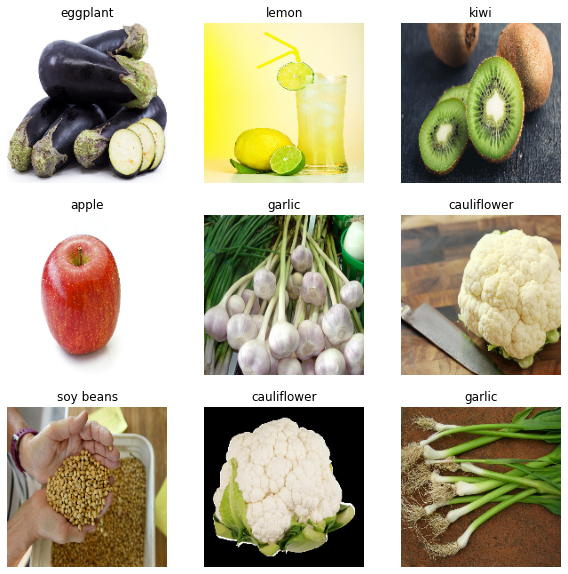

In [11]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [12]:
from tensorflow.keras.models import Sequential

In [13]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [16]:
epochs_size = 5
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 542ms/step - accuracy: 0.0661 - loss: 3.7062 - val_accuracy: 0.2934 - val_loss: 2.5030
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 589ms/step - accuracy: 0.2700 - loss: 2.5082 - val_accuracy: 0.5043 - val_loss: 1.6384
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 538ms/step - accuracy: 0.4462 - loss: 1.9274 - val_accuracy: 0.7493 - val_loss: 0.9001
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 468ms/step - accuracy: 0.6023 - loss: 1.3494 - val_accuracy: 0.8490 - val_loss: 0.6949
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.7648 - loss: 0.8191 - val_accuracy: 0.9003 - val_loss: 0.4490


Text(0.5, 1.0, 'Loss')

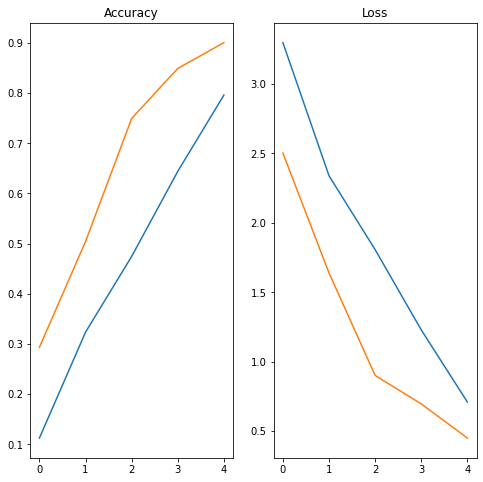

In [17]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

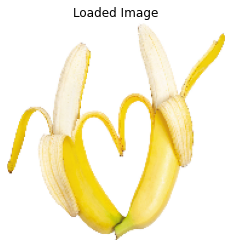

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Veg/Fruit in image is banana with accuracy of 73.13


In [18]:
image = "C:\\Users\\nikhi\\OneDrive\\Desktop\\cgproject\\Image_classification\\banana.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

# Display the image using Matplotlib
plt.imshow(image)
plt.title('Loaded Image')
plt.axis('off')
plt.show()

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

model.save('Image_classify.keras')

